In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
path = f'../data/target_kansai_stations_with_stats.csv'
stations = pd.read_csv(path)

target_pref_cds = [
    25, # 滋賀
    26, # 京都
    27, # 大阪
    28, # 兵庫
    29, # 奈良
    30, # 和歌山    
]

stations.head(10)



,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km
0,1141501,1141501,米原,NaN,NaN,11415,25,521-0012,米原市米原,136.289992,...,387.0,78.677607,1.074704,0.00000,184.0,150.139302,142.085853,34322.719402,17515.236022,105.845332
1,1141502,1141502,坂田,NaN,NaN,11415,25,521-0062,米原市宇賀野,136.287743,...,289.0,108.530997,1.036659,0.00346,146.0,90.807199,85.331388,26607.644980,14312.609927,66.622367
2,1141503,1141503,田村,NaN,NaN,11415,25,526-0829,長浜市田村町,136.281813,...,157.0,112.335363,1.053073,0.00000,78.0,73.056087,66.474457,23062.044030,11607.790799,51.336710
3,1141504,1141504,長浜,NaN,NaN,11415,25,526-0057,長浜市北船町,136.264901,...,491.0,77.684851,1.064590,0.00000,226.0,169.449737,160.531330,39682.901005,20010.420220,118.562355
4,1141505,1141505,虎姫,NaN,NaN,11415,25,529-0144,滋賀県長浜市大寺町細田1043,136.257385,...,284.0,95.743810,1.035450,0.00000,133.0,85.460993,77.883171,22894.488222,11447.244111,55.991685
5,1141506,1141506,河毛,NaN,NaN,11415,25,529-0317,滋賀県長浜市湖北町山脇560,136.249519,...,179.0,109.721838,1.091130,0.00000,92.0,75.715154,60.252200,20396.436630,10472.263716,49.054888
6,1141507,1141507,高月,NaN,NaN,11415,25,529-0241,滋賀県長浜市高月町落川33-26,136.237716,...,241.0,106.930896,1.034531,0.00000,119.0,95.709469,79.578660,27554.679744,13856.551287,63.985544
7,1141508,1141508,木ノ本,NaN,NaN,11415,25,529-0425,滋賀県長浜市木之本町木之本1543,136.221706,...,355.0,87.229924,1.057388,0.00000,143.0,126.345700,120.106406,31217.486124,16100.821607,74.351585
8,1141509,1141509,余呉,NaN,NaN,11415,25,529-0521,滋賀県長浜市余呉町下余呉1727,136.197591,...,43.0,207.687767,1.048859,0.00000,30.0,26.392230,23.992937,14284.713051,7142.356525,23.992937
9,1141510,1141510,近江塩津,NaN,NaN,11415,25,529-0706,滋賀県長浜市西浅井町余245,136.151236,...,39.0,159.238385,1.093543,0.00000,21.0,49.898185,33.754655,18228.385390,9114.192695,30.819468


In [15]:
len(stations)


1701

In [34]:
# 欠損している駅を除く
#stations = stations[stations['station_cd'] != 1130407]
exclude_cds = [
    1161408,
    1163924,
    3100314,
    3200802,
    3400314,
    9962609
             ]
stations = stations[~stations['station_cd'].isin(exclude_cds)]

In [41]:
X_columns = ['n', 'm', 'k_avg', 'intersection_count',
       'streets_per_node_avg', 'edge_length_total', 'edge_length_avg',
       'street_length_total', 'street_length_avg', 'street_segment_count',
       'node_density_km', 'intersection_density_km', 'edge_density_km',
       'street_density_km', 'circuity_avg', 'self_loop_proportion',
       'clean_intersection_count', 'clean_intersection_density_km']


In [42]:
stations

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km
0,1141501,1141501,米原,NaN,NaN,11415,25,521-0012,米原市米原,136.289992,...,387.0,78.677607,1.074704,0.000000,184.0,150.139302,142.085853,34322.719402,17515.236022,105.845332
1,1141502,1141502,坂田,NaN,NaN,11415,25,521-0062,米原市宇賀野,136.287743,...,289.0,108.530997,1.036659,0.003460,146.0,90.807199,85.331388,26607.644980,14312.609927,66.622367
2,1141503,1141503,田村,NaN,NaN,11415,25,526-0829,長浜市田村町,136.281813,...,157.0,112.335363,1.053073,0.000000,78.0,73.056087,66.474457,23062.044030,11607.790799,51.336710
3,1141504,1141504,長浜,NaN,NaN,11415,25,526-0057,長浜市北船町,136.264901,...,491.0,77.684851,1.064590,0.000000,226.0,169.449737,160.531330,39682.901005,20010.420220,118.562355
4,1141505,1141505,虎姫,NaN,NaN,11415,25,529-0144,滋賀県長浜市大寺町細田1043,136.257385,...,284.0,95.743810,1.035450,0.000000,133.0,85.460993,77.883171,22894.488222,11447.244111,55.991685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,9960905,9960905,丹後由良,NaN,NaN,99653,26,626-0071,宮津市由良,135.279582,...,169.0,97.153710,1.051399,0.000000,82.0,79.820684,70.508270,21842.899464,10921.449732,54.544134
1697,9960904,9960904,丹後神崎,NaN,NaN,99653,26,624-0963,舞鶴市油江,135.293628,...,28.0,153.013143,1.045885,0.000000,18.0,32.271591,24.203694,11521.947791,5760.973895,24.203694
1698,9960903,9960903,東雲,NaN,NaN,99653,26,624-0965,舞鶴市水間,135.284927,...,36.0,197.988861,1.107317,0.027778,24.0,27.876570,24.779174,14718.001035,7359.000518,24.779174
1699,9960902,9960902,四所,NaN,NaN,99653,26,624-0951,舞鶴市上福井,135.290471,...,30.0,157.877033,1.051051,0.000000,19.0,35.052959,28.042367,13281.737209,6640.868604,26.640249


In [44]:
stations[stations['street_segment_count'].isnull()].head(20)

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データ分割
X = stations[X_columns]
X_train = X

#標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

#主成分分析
pca = PCA(n_components=3)
pca.fit(X_std[40:45])
X_pca = pca.transform(X_std)

print('主成分分析前のデータ次元：{}'.format(X.shape))
print('主成分分析後のデータ次元：{}'.format(X_pca.shape))

#グラフ化
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1])], axis=1)
merge_data.columns = ['pc1','pc2']

主成分分析前のデータ次元：(1695, 18)
主成分分析後のデータ次元：(1695, 3)


In [46]:
merge_data.to_csv('../data/kansai_stations_pca.csv')

In [47]:
# 寄与率
print(pca.explained_variance_ratio_)

[0.60864298 0.2997448  0.06621907]


In [48]:
# 基底ベクトルの値
pca.components_

array([[-0.15079366, -0.20508445, -0.49556771, -0.18673816, -0.3266916 ,
        -0.20826134,  0.10732736, -0.16908709,  0.11017909, -0.1812237 ,
        -0.16480347, -0.21740512, -0.2968462 , -0.240199  ,  0.25625441,
         0.13513655, -0.20954133, -0.26735316],
       [ 0.25466912,  0.18576413, -0.60841492,  0.1850242 , -0.44736738,
         0.11420336, -0.1361784 ,  0.15559699, -0.12224816,  0.19199078,
         0.19671972,  0.13408936,  0.01562068,  0.08206676, -0.09205067,
        -0.00838888,  0.26428386,  0.21551195],
       [ 0.03436936,  0.07596571,  0.31437721, -0.03012124, -0.34544239,
        -0.06944461, -0.12882295, -0.18878913, -0.1533542 ,  0.00776002,
         0.19465889,  0.13612144,  0.22177189,  0.04318446,  0.68574998,
         0.2884981 , -0.05927018,  0.16992434]])

In [49]:
merge_data = pd.read_csv('../data/kansai_stations_pca.csv')

In [50]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
pc = merge_data[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    275
1    407
2    531
3    482
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

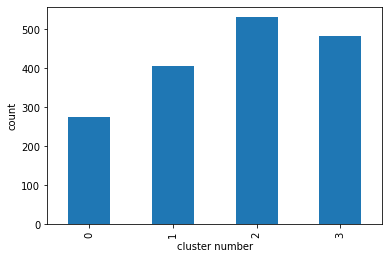

In [51]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=4, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number', index=stations.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [53]:
# 駅のデータにクラスター番号のデータを結合
stations_with_cluster = pd.concat([stations, pd.Series(labels, index=stations.index)], axis=1)

# 先頭の5行を表示
stations_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km,cluster_number
0,1141501,1141501,米原,NaN,NaN,11415,25,521-0012,米原市米原,136.289992,...,78.677607,1.074704,0.00000,184.0,150.139302,142.085853,34322.719402,17515.236022,105.845332,3
1,1141502,1141502,坂田,NaN,NaN,11415,25,521-0062,米原市宇賀野,136.287743,...,108.530997,1.036659,0.00346,146.0,90.807199,85.331388,26607.644980,14312.609927,66.622367,1
2,1141503,1141503,田村,NaN,NaN,11415,25,526-0829,長浜市田村町,136.281813,...,112.335363,1.053073,0.00000,78.0,73.056087,66.474457,23062.044030,11607.790799,51.336710,1
3,1141504,1141504,長浜,NaN,NaN,11415,25,526-0057,長浜市北船町,136.264901,...,77.684851,1.064590,0.00000,226.0,169.449737,160.531330,39682.901005,20010.420220,118.562355,3
4,1141505,1141505,虎姫,NaN,NaN,11415,25,529-0144,滋賀県長浜市大寺町細田1043,136.257385,...,95.743810,1.035450,0.00000,133.0,85.460993,77.883171,22894.488222,11447.244111,55.991685,1


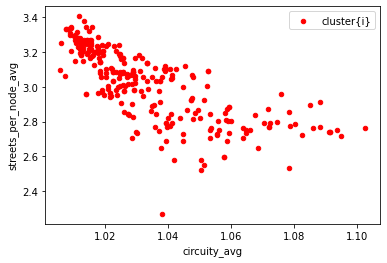

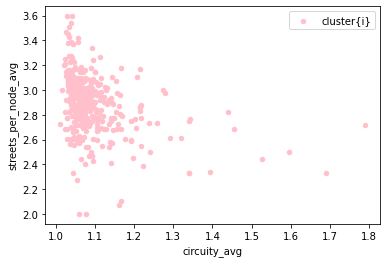

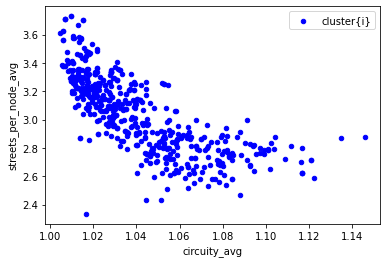

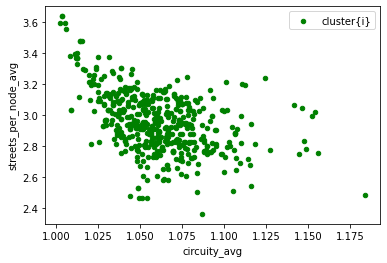

In [54]:
stations_0 = stations_with_cluster[stations_with_cluster['cluster_number'] == 0]
stations_1 = stations_with_cluster[stations_with_cluster['cluster_number'] == 1]
stations_2 = stations_with_cluster[stations_with_cluster['cluster_number'] == 2]
stations_3 = stations_with_cluster[stations_with_cluster['cluster_number'] == 3]
# クラスタリング結果のグラフ化
ax = None
colors = ['red', 'pink', 'blue', 'green']
for i, station in stations_with_cluster.groupby('cluster_number'):
    station.plot.scatter(x='circuity_avg', y='streets_per_node_avg', color=colors[i], label='cluster{i}', ax=ax)

In [56]:
import folium
center_lat, center_lon = (34.6413, 135.5629) # 大阪の緯度経度

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in stations_with_cluster.iterrows():
    color = 'red' if station['cluster_number'] == 0 else 'pink' if station['cluster_number'] == 1 else 'blue' if station['cluster_number'] == 2 else 'green'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [57]:
stations_with_cluster.to_csv('../data/kansai_stations_with_cluster.csv', index=False)